# Calibration Analysis

- [Parameters](#Parameters)
- [Data Loading](#Data-Loading)
- [Summary Statistics](#Summary-Statistics)
- [Visualizations](#Visualizations)
- [Best/Worst Cases](#Best-Worst-Cases)
- [Environment Info](#Environment-Info)

In [27]:
import os
import pandas as pd

# Parameters
date = '2020-01-01'
detector = 'w2e_in'
number = 0
project_root = os.environ["HORNSGATAN_HOME"]

if number > 0:
    postfix = f"{detector}_{date}_{number}"
else:
    postfix = f"{detector}_{date}"

data_path = os.path.join(project_root, "data/calibration_data", f"calibrated_data_{postfix}.csv")
print("Data path:", data_path)

Data path: /home/kaveh/projects/Hornsgatan/data/calibration_data/calibrated_data_w2e_in_2020-01-01.csv


In [28]:
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("Loaded data:", df.shape)
else:
    raise FileNotFoundError(f"File not found: {data_path}")
df.head()

Loaded data: (10162, 10)


,veh_id,time_detector_sim,speed_detector_sim,speed_factor,time_detector_real,depart,departSpeed,speed_detector_real,delta_time,delta_speed
0,0_w2e_in,1.577837e+09,10.262976,1.232050,1577836811,1577836769,max,9.166667,0.10,1.096310
1,1_w2e_in,1.577837e+09,9.816909,1.178501,1577836814,1577836770,max,7.500000,0.21,2.316909
2,2_w2e_in,1.577837e+09,10.049487,1.206421,1577836815,1577836770,max,8.888889,0.25,1.160598
3,3_w2e_in,1.577837e+09,11.093025,1.331696,1577836826,1577836787,max,11.111111,0.09,-0.018086
4,4_w2e_in,1.577837e+09,8.030520,0.964048,1577836847,1577836793,max,7.777778,-0.16,0.252742


In [29]:
# Show summary stats for error columns
error_cols = ["delta_time", "delta_speed"]
df[error_cols].describe()

,delta_time,delta_speed
count,10162.000000,10162.000000
mean,0.122319,0.968131
std,0.932239,1.266152
min,-10.020000,-3.036421
25%,0.020000,0.046625
50%,0.110000,0.558978
75%,0.280000,1.566291
max,5.030000,9.333182


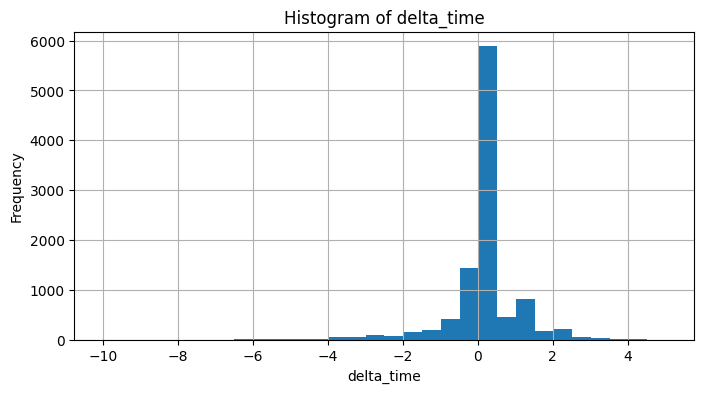

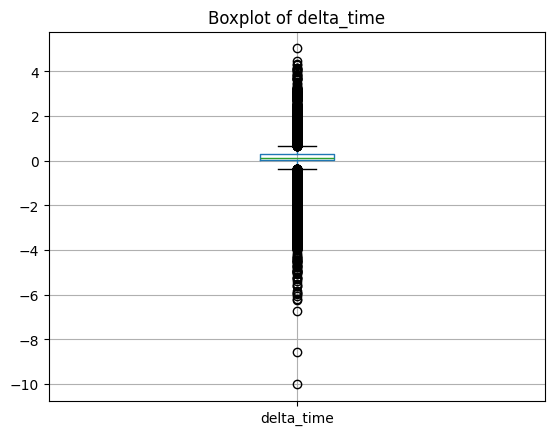

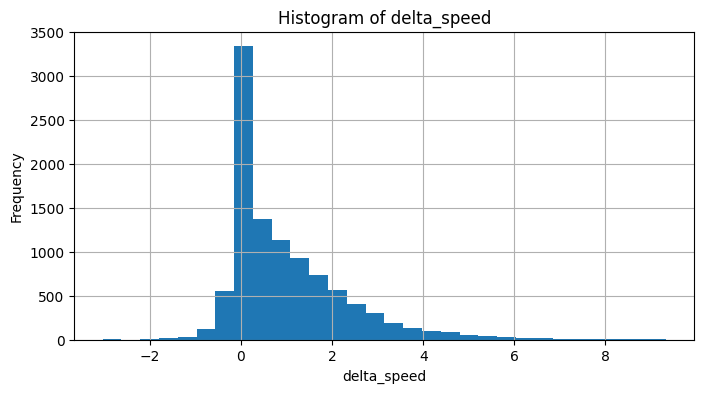

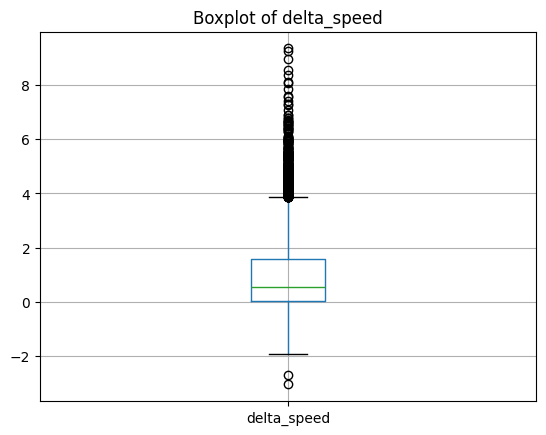

In [30]:
import matplotlib.pyplot as plt

for col in error_cols:
    plt.figure(figsize=(8,4))
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [31]:
# Show rows with smallest/largest delta_time
print("Smallest delta_time:")
display(df.nsmallest(5, "delta_time"))
print("Largest delta_time:")
display(df.nlargest(5, "delta_time"))

Smallest delta_time:


,veh_id,time_detector_sim,speed_detector_sim,speed_factor,time_detector_real,depart,departSpeed,speed_detector_real,delta_time,delta_speed
8248,8248_w2e_in,1.577908e+09,8.285962,2.875121,1577907922,1577907885,max,7.222222,-10.02,1.063739
5994,5994_w2e_in,1.577894e+09,9.752245,2.487234,1577893713,1577893678,max,6.666667,-8.59,3.085578
5807,5807_w2e_in,1.577893e+09,8.065954,2.855879,1577892777,1577892746,max,5.833333,-6.74,2.232620
3097,3097_w2e_in,1.577877e+09,7.787708,3.200000,1577877465,1577877430,max,6.111111,-6.26,1.676597
3150,3150_w2e_in,1.577878e+09,7.020919,2.789811,1577877759,1577877725,max,5.555556,-6.19,1.465363


Largest delta_time:


,veh_id,time_detector_sim,speed_detector_sim,speed_factor,time_detector_real,depart,departSpeed,speed_detector_real,delta_time,delta_speed
6098,6098_w2e_in,1.577894e+09,8.583393,1.274417,1577894219,1577894182,max,2.222222,5.03,6.361170
7716,7716_w2e_in,1.577904e+09,7.457163,3.082310,1577903999,1577903975,max,5.555556,4.47,1.901608
6099,6099_w2e_in,1.577894e+09,5.051636,3.200000,1577894220,1577894182,max,2.222222,4.34,2.829414
5800,5800_w2e_in,1.577893e+09,6.609444,3.200000,1577892755,1577892720,max,7.500000,4.28,-0.890556
4340,4340_w2e_in,1.577885e+09,6.900919,3.200000,1577884743,1577884717,max,5.277778,4.16,1.623141


1. Distribution Plots (Seaborn)

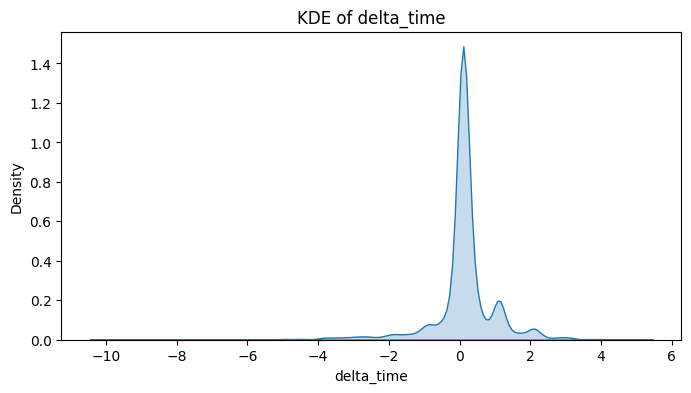

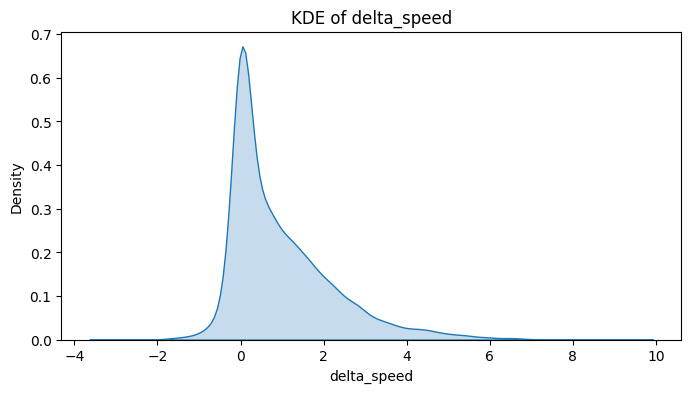

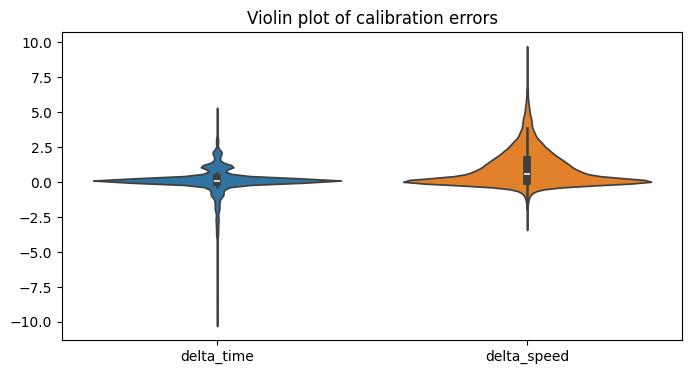

In [32]:
import seaborn as sns

# KDE plot for delta_time and delta_speed
for col in error_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# Violin plot
plt.figure(figsize=(8,4))
sns.violinplot(data=df[error_cols])
plt.title("Violin plot of calibration errors")
plt.show()

2. Scatter Plot: Simulated vs. Real Values


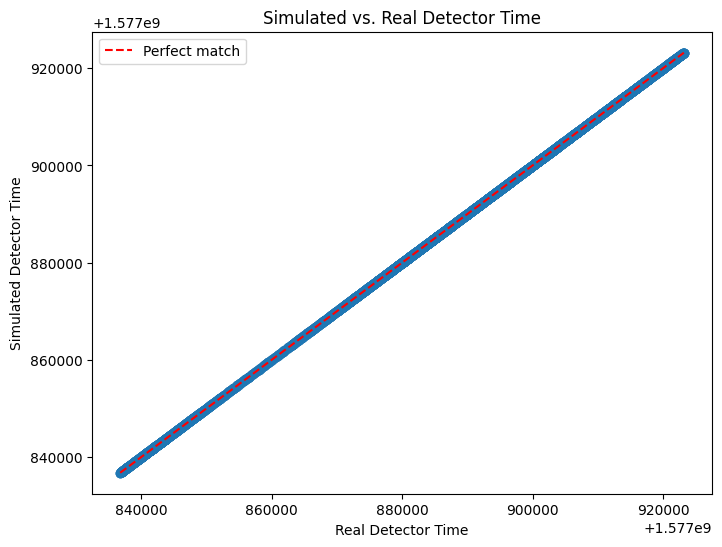

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df['time_detector_real'], df['time_detector_sim'], alpha=0.5)
plt.plot([df['time_detector_real'].min(), df['time_detector_real'].max()],
         [df['time_detector_real'].min(), df['time_detector_real'].max()],
         'r--', label='Perfect match')
plt.xlabel('Real Detector Time')
plt.ylabel('Simulated Detector Time')
plt.title('Simulated vs. Real Detector Time')
plt.legend()
plt.show()

3. Error Over Time


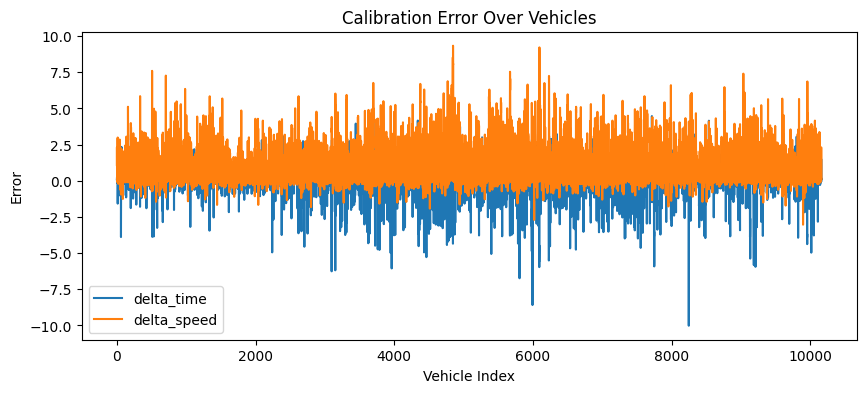

In [38]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

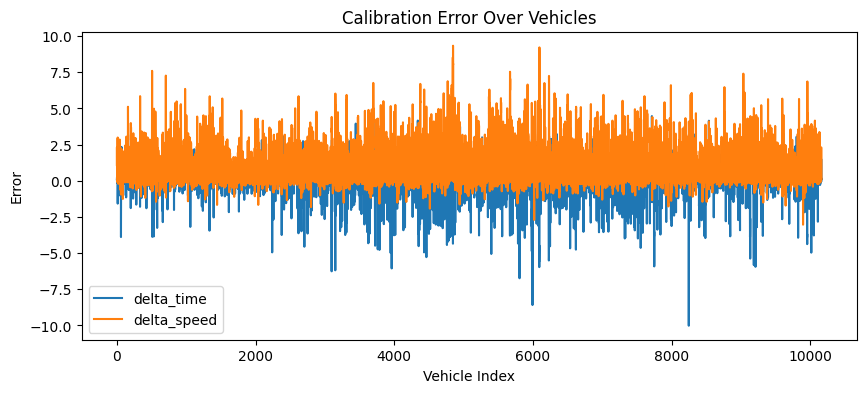

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

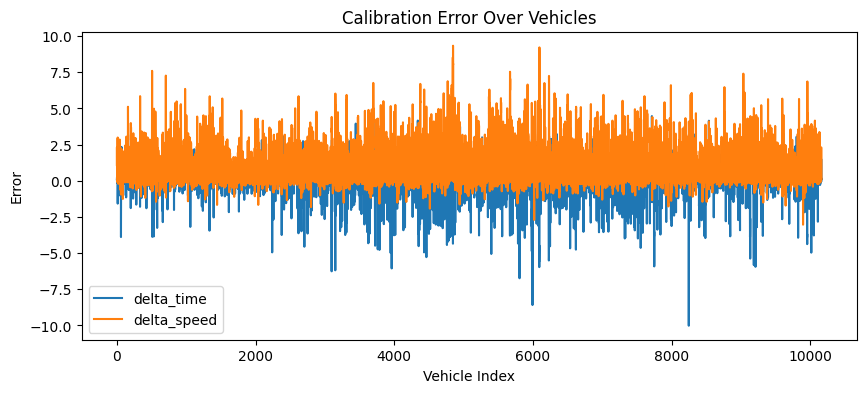

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

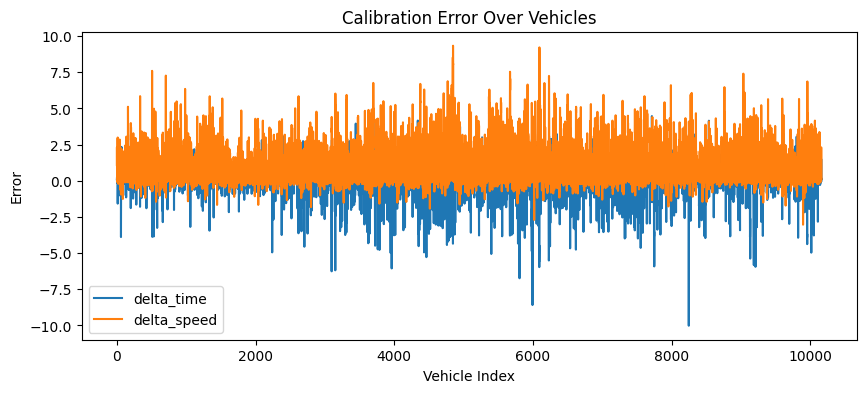

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

4. Correlation Matrix

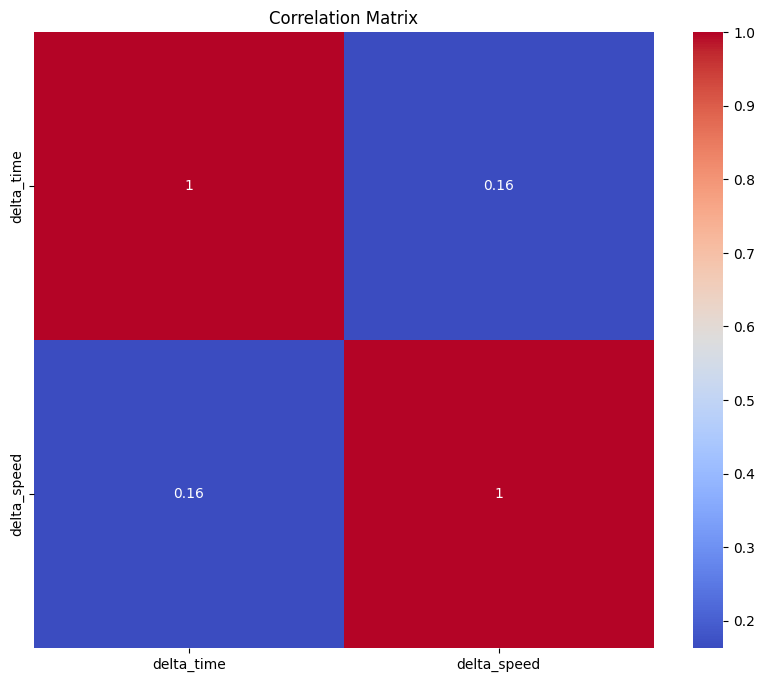

In [39]:
corr = df[["delta_time","delta_speed"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

5. Outlier Detection


In [26]:
for col in error_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    print(f"Number of outliers in {col}: {len(outliers)}")
    display(outliers[[col]].head())

Number of outliers in delta_time: 2751


,delta_time
11,1.02
12,-1.58
14,1.09
15,1.21
23,1.10


Number of outliers in delta_speed: 395


,delta_speed
160,5.113951
161,3.879893
201,3.987036
335,5.847836
508,7.596385


6. Error by Speed Factor (if available)


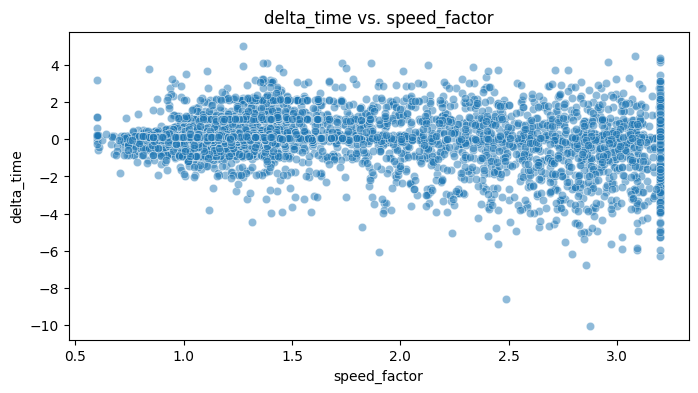

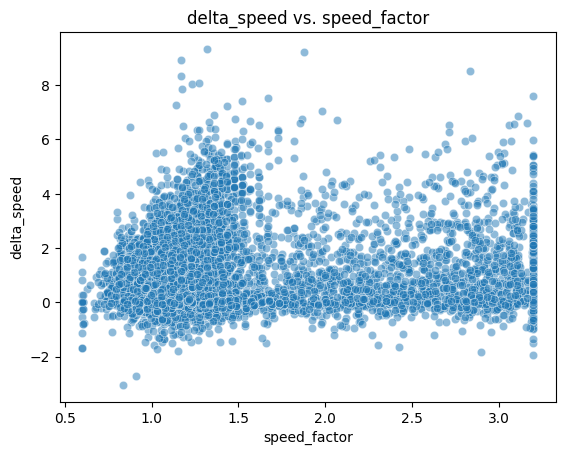

In [35]:
if 'speed_factor' in df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x='speed_factor', y='delta_time', data=df, alpha=0.5)
    plt.title('delta_time vs. speed_factor')
    plt.show()
    sns.scatterplot(x='speed_factor', y='delta_speed', data=df, alpha=0.5)
    plt.title('delta_speed vs. speed_factor')
    plt.show()

7. Summary Table of Top N Largest Errors

In [43]:
N = 10
df['time_detector_sim'] = df['time_detector_sim'].apply(int)
print("Top N largest delta_time errors:")
display(df.nlargest(N, 'delta_time')[['veh_id', 'delta_speed', 'delta_time', 'time_detector_real', 'time_detector_sim']])
print("Top N largest delta_speed errors:")
display(df.nlargest(N, 'delta_speed')[['veh_id', 'delta_time', 'delta_speed', 'speed_detector_real', 'speed_detector_sim']])

Top N largest delta_time errors:


,veh_id,delta_speed,delta_time,time_detector_real,time_detector_sim
6098,6098_w2e_in,6.361170,5.03,1577894219,1577894224
7716,7716_w2e_in,1.901608,4.47,1577903999,1577904003
6099,6099_w2e_in,2.829414,4.34,1577894220,1577894224
5800,5800_w2e_in,-0.890556,4.28,1577892755,1577892759
4340,4340_w2e_in,1.623141,4.16,1577884743,1577884747
8538,8538_w2e_in,0.069820,4.15,1577910001,1577910005
5541,5541_w2e_in,5.414400,4.09,1577891324,1577891328
5542,5542_w2e_in,5.009283,4.09,1577891326,1577891330
984,984_w2e_in,6.347644,4.07,1577845049,1577845053
3698,3698_w2e_in,6.762080,4.07,1577880977,1577880981


Top N largest delta_speed errors:


,veh_id,delta_time,delta_speed,speed_detector_real,speed_detector_sim
4848,4848_w2e_in,2.28,9.333182,1.666667,10.999849
6094,6094_w2e_in,-3.50,9.218229,0.833333,10.051563
6095,6095_w2e_in,1.17,8.924039,0.833333,9.757372
4845,4845_w2e_in,0.34,8.527395,1.111111,9.638506
6096,6096_w2e_in,2.15,8.334193,1.388889,9.723081
4850,4850_w2e_in,2.09,8.086181,2.500000,10.586181
4849,4849_w2e_in,2.15,8.040985,2.222222,10.263207
6097,6097_w2e_in,2.54,7.850040,1.944444,9.794484
508,508_w2e_in,-2.56,7.596385,6.388889,13.985274
5670,5670_w2e_in,3.07,7.533604,6.388889,13.922492


8. Save Plots to Disk


In [44]:
plt.figure(figsize=(8,4))
df['delta_time'].hist(bins=30)
plt.title('Histogram of delta_time')
plt.xlabel('delta_time')
plt.ylabel('Frequency')
plt.savefig('delta_time_histogram.png')
plt.close()